In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
np.random.seed(42)
data1 = np.random.normal(10000, 1000, 500).astype(int)
data3 = np.random.normal(9000, 900, 500).astype(int)
data2 = np.random.normal(12000, 1200, 500).astype(int)
data4 = np.random.normal(10000, 950, 500).astype(int)
df = pd.DataFrame(np.array([data1,data2,data3,data4]).T, columns=['A_before','A_after','B_before','B_after'])
measure = df.copy()

In [2]:
measure

,A_before,A_after,B_before,B_after
0,10496,13679,9833,10739
1,9861,13109,10718,9476
2,10647,12071,7741,9222
3,11523,11223,9506,9996
4,9765,12837,8414,9838
...,...,...,...,...
495,10538,14407,8747,11016
496,8962,14473,10617,9974
497,9809,13450,9576,9162
498,9124,13228,8485,9845


In [3]:
measure.dtypes

A_before    int64
A_after     int64
B_before    int64
B_after     int64
dtype: object

In [4]:
cats = list(measure.select_dtypes(include=['object']).columns)
nums = list(measure.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  []
numerical variables:  ['A_before', 'A_after', 'B_before', 'B_after']


In [5]:
measure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   A_before  500 non-null    int64
 1   A_after   500 non-null    int64
 2   B_before  500 non-null    int64
 3   B_after   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [6]:
measure.describe().T

,count,mean,std,min,25%,50%,75%,max
A_before,500.0,10006.336,981.255496,6758.0,9299.25,10012.5,10636.00,13852.0
A_after,500.0,12129.684,1212.298473,8524.0,11276.75,12143.5,12905.50,15122.0
B_before,500.0,9028.146,880.197872,6572.0,8463.50,9025.0,9585.75,11369.0
B_after,500.0,10031.004,934.875836,7206.0,9418.00,9991.0,10664.50,13033.0


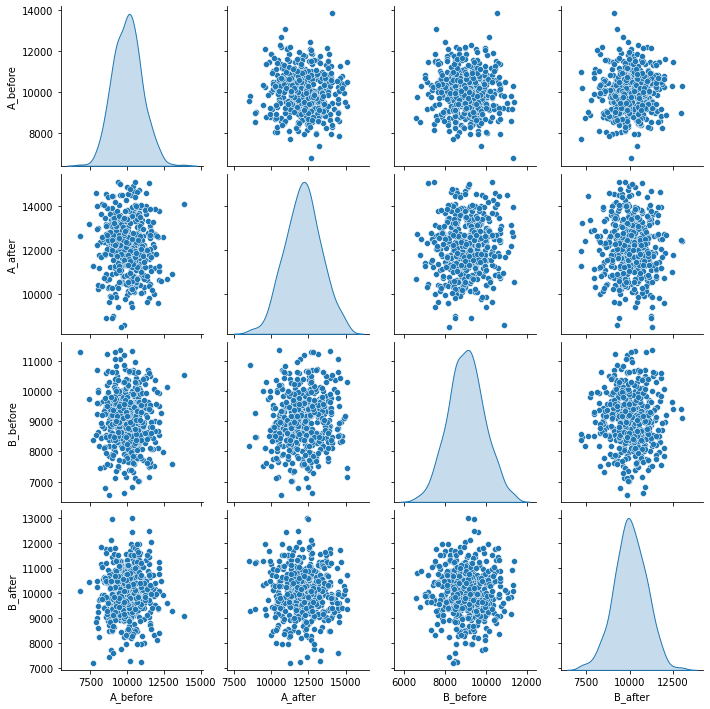

In [7]:
sns.pairplot(measure, diag_kind="kde")

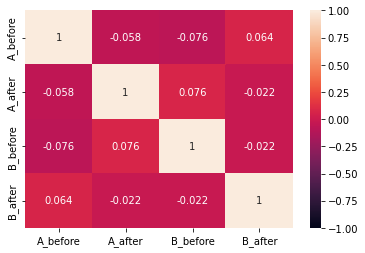

In [8]:
sns.heatmap(measure.corr(), vmin=-1, vmax=1, annot=True)

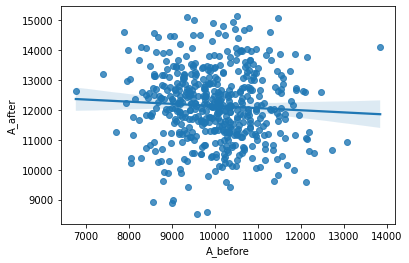

In [12]:
sns.regplot(x="A_before", y="A_after", ci=95, data=measure)

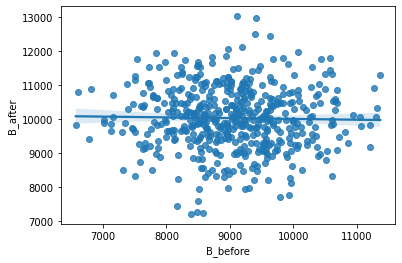

In [13]:
sns.regplot(x="B_before", y="B_after", ci=95, data=measure)

**2.3:**

In [14]:
from scipy.stats import shapiro

In [16]:
t_value, p_value = shapiro(measure["A_before"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9967007040977478 0.4010743498802185
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [17]:
t_value, p_value = shapiro(measure["A_after"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9972554445266724 0.5761163234710693
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [18]:
t_value, p_value = shapiro(measure["B_before"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9975419640541077 0.6761667728424072
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [19]:
t_value, p_value = shapiro(measure["B_after"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9972566962242126 0.5765427947044373
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


**2.4.1**:

In [20]:
from scipy import stats

In [21]:
t_value, p_value = stats.ttest_1samp(measure["A_before"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.1443836673305787 0.8852558068210546
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


In [22]:
t_value, p_value = stats.ttest_1samp(measure["A_after"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

39.28173054055545 8.463124270966448e-155
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [23]:
t_value, p_value = stats.ttest_1samp(measure["B_before"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

-24.68912591338864 1.5530767757531843e-88
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [24]:
t_value, p_value = stats.ttest_1samp(measure["B_after"], popmean = 10000 )
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.7415642684174482 0.45870023938366455
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


**2.4.2:**

In [25]:
t_value, p_value = stats.ttest_rel(measure["A_before"],measure["A_after"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

-29.616560617895175 5.3664592819786775e-112
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [26]:
t_value, p_value = stats.ttest_rel(measure["B_before"],measure["B_after"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

-17.279366523199087 8.88132208358409e-53
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


**2.4.3:**

In [29]:
t_value, p_value = stats.ttest_ind(measure["A_before"],measure["B_before"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

16.59327027514793 8.564745398943361e-55
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.


In [28]:
t_value, p_value = stats.ttest_ind(measure["A_after"],measure["B_after"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

30.65376921752174 5.947168761769308e-146
H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.
